In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

img1 = plt.imread('box_left_2k.jpg')
img2 = plt.imread('box_right_2k.jpg')

pts1 = np.array([[1148, 351], [1441, 481], [1427, 662], [1172, 525], [1524,80], [1795,134], [1744,307],
        [1564, 320], [1579, 306], [1584, 288]])

pts2 = np.array([[747, 397], [944,522], [1010,704], [822,558], [1212,116], [1440,170], [1433,350],
        [1131,360], [1152,342], [1166,326]])

K1 = np.array([[1062.04, 0, 1098.52], [0, 1061.74, 599.665], [0, 0, 1]])
K2 = np.array([[1060.59, 0, 1127.03], [0, 1060.06, 645.711], [0, 0, 1]])


In [159]:
# TODO 1 (15 points): Normalize image points.
#        There is no need to use for loops in this task. If you use for loops in this task, you can get at most 10 point.
def normalize(pts):
    mean_point =np.mean(pts,axis=0) 

    all_point_distance = np.sum(np.linalg.norm(pts-mean_point,axis=1))
    s = len(pts)*np.sqrt(2)/all_point_distance
    pts_normal = (pts-mean_point)*s
    return pts_normal,s,mean_point
    
pts1_normal,s1,t1 = normalize(pts1) 
pts2_normal,s2,t2 = normalize(pts2) 

T1 = np.array([[s1,0,-s1*t1[0]],
               [0,s1,-s1*t1[1]],
               [0, 0,1]])

T2 = np.array([[s2,0,-s2*t2[0]],
               [0,s2,-s2*t2[1]],
               [0, 0,1]])

print('T1:\n',T1)
print('T2:\n',T2)

print('\nThe mean distance of the image points in pts1_normal: ',np.sum(np.linalg.norm(pts1_normal,axis=1))/len(pts1_normal))




T1:
 [[ 6.04724204e-03  0.00000000e+00 -9.05755912e+00]
 [ 0.00000000e+00  6.04724204e-03 -2.08871740e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T2:
 [[ 5.80924993e-03  0.00000000e+00 -6.42328765e+00]
 [ 0.00000000e+00  5.80924993e-03 -2.23365660e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

The mean distance of the image points in pts1_normal:  1.4142135623730951


In [161]:
# TODO 2 (25 points): Compute the fundamental matrix F.
A = np.zeros((len(pts1_normal),9))

pts1_normal_homo =np.hstack([pts1_normal,np.ones((10,1))]) 
pts2_normal_homo =np.hstack([pts2_normal,np.ones((10,1))]) 

for i in range(1,len(pts1_normal)+1):
    tmp = np.dot(pts2_normal_homo[i-1:i].T,pts1_normal_homo[i-1:i])
    a = tmp.flatten()
    A[i-1,:] = a
#print(A)

u, s, vh = np.linalg.svd(A, full_matrices=False)
f = vh[-1,:]
F_ = f.reshape((3,3))
#print(F)
#print(np.linalg.matrix_rank(F))
u,s,vh = np.linalg.svd(F_,full_matrices=False)
#print(u.shape,s.shape,vh.shape)
s[2] = 0
sigma = np.diag(s)
Fn =np.linalg.multi_dot([u,sigma,vh])
F = np.linalg.multi_dot([T2.T,Fn,T1])
print('F:\n',F)

pts1_homo =np.hstack([pts1,np.ones((10,1))]) 
pts2_homo =np.hstack([pts2,np.ones((10,1))]) 

b = np.linalg.multi_dot([pts2_homo,F,pts1_homo.T])
epipolar_error = np.sum(b)
print('\nepipolar_error: ',epipolar_error)



    
    

F:
 [[-2.96749677e-08 -4.49803700e-09  1.75459965e-04]
 [-9.60722086e-07 -2.81014807e-07  5.70402163e-03]
 [ 2.35736356e-04 -4.08942359e-03 -6.76779373e-01]]

epipolar_error:  0.9554638059775242


Text(0.5, 1.0, 'Figure 2: right image')

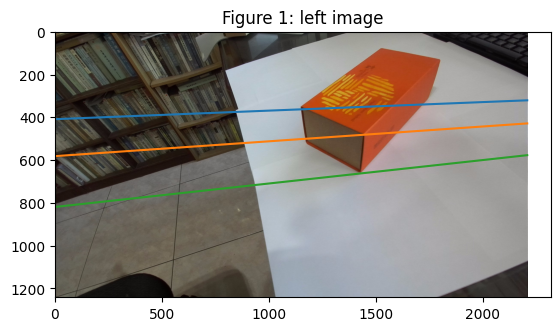

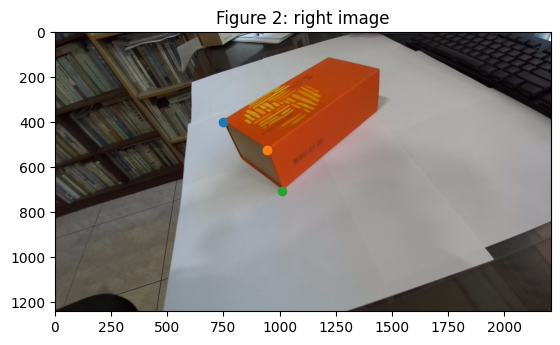

In [28]:

# TODO 3 (15 points): Draw epipolar lines in image1.
def get_epipolar_line(point,F,img):
    reshape_point = np.reshape(point,(3,1))
    epipolar_line = np.dot(F.T,reshape_point)
    x = np.linspace(0,img.shape[1],1000)
    y = -(epipolar_line[0]*x+epipolar_line[2])/epipolar_line[1]
    return x,y, epipolar_line
    
p1_,p2_,p3_ = pts2_homo[0:3]


plt.figure(1)
plt.imshow(img1)

x1,y1,p1_epipolar_line = get_epipolar_line(p1_,F,img1)
plt.plot(x1,y1)

x2,y2,p2_epipolar_line = get_epipolar_line(p2_,F,img1)
plt.plot(x2,y2)

x3,y3,p3_epipolar_line = get_epipolar_line(p3_,F,img1)
plt.plot(x3,y3)

plt.title('Figure 1: left image')

plt.figure(2)
plt.imshow(img2)
plt.scatter(p1_[0],p1_[1])
plt.scatter(p2_[0],p2_[1])
plt.scatter(p3_[0],p3_[1])
plt.title('Figure 2: right image')




Text(0.5, 1.0, 'Figure 3:')

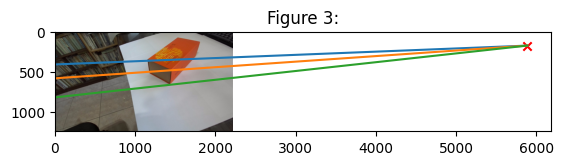

In [164]:
# TODO 4 (10 points): Draw the epipole and epipolar lines in image1.
# X = np.inv([[a1,b1],[a2,b2]])*[[-c1],[-c2]]
# X = np.inv([[a2,b2],[a3,b3]])*[[-c2],[-c3]]

a = np.array([p1_epipolar_line[0:2],p2_epipolar_line[0:2]])
b = np.array([-p1_epipolar_line[2],-p2_epipolar_line[2]])

a2 = np.array([p2_epipolar_line[0:2],p3_epipolar_line[0:2]])
b2 = np.array([-p2_epipolar_line[2],-p3_epipolar_line[2]])

a = a.reshape(2,2)
a2 = a2.reshape(2,2)

epipole =np.linalg.inv(a).dot(b) 

x1 = np.hstack([x1,epipole[0]])
y1 = np.hstack([y1,epipole[1]])
x2 = np.hstack([x2,epipole[0]])
y2 = np.hstack([y2,epipole[1]])
x3 = np.hstack([x3,epipole[0]])
y3 = np.hstack([y3,epipole[1]])




plt.figure(3)
plt.imshow(img1)

plt.plot(x1,y1)

plt.plot(x2,y2)

plt.plot(x3,y3)
plt.scatter(epipole[0],epipole[1],marker='x',c='r')

plt.title('Figure 3:')

In [169]:
# TODO 5 (5 points): Compute the 4 possible camera matrices.
E = np.linalg.multi_dot([K2.T,F,K1])
u,s,vh = np.linalg.svd(E)
#print(u,s,vh)
u3 = u[-1,:]

W = np.array([[0,-1,0],[1,0,0],[0,0,1]])
uwv_mat =np.linalg.multi_dot([u,W,vh]) 

if np.linalg.det(uwv_mat) < 0:
    uwv_mat =np.linalg.multi_dot([u,-W,vh]) 
    

R1 = uwv_mat
R2 = np.linalg.multi_dot([u,W.T,vh])
t1 = u3.reshape((3,1))
t2 = -u3.reshape((3,1))


Rt2_list = [np.hstack([R1,t1]),np.hstack([R1,t2]),np.hstack([R2,t1]),np.hstack([R2,t2])]    

for i,r in  enumerate(Rt2_list):
    print('Rt2_list[',i,']\n',r)





Rt2_list[ 0 ]
 [[ 0.96928518 -0.11770064  0.21594628 -0.51167401]
 [-0.11386476 -0.99303824 -0.03016402  0.85917901]
 [ 0.21799323  0.00464886 -0.97593921 -0.0010673 ]]
Rt2_list[ 1 ]
 [[ 0.96928518 -0.11770064  0.21594628  0.51167401]
 [-0.11386476 -0.99303824 -0.03016402 -0.85917901]
 [ 0.21799323  0.00464886 -0.97593921  0.0010673 ]]
Rt2_list[ 2 ]
 [[ 0.97497613 -0.05527304  0.21532867 -0.51167401]
 [ 0.05292778  0.99845958  0.01664701  0.85917901]
 [-0.2159171  -0.00483357  0.97639973 -0.0010673 ]]
Rt2_list[ 3 ]
 [[ 0.97497613 -0.05527304  0.21532867  0.51167401]
 [ 0.05292778  0.99845958  0.01664701 -0.85917901]
 [-0.2159171  -0.00483357  0.97639973  0.0010673 ]]


In [197]:
# TODO 6 (25 points): Triangulation.
#        There is no need to use for loops when computing the reconstruction errors of pts1 (or pts2).
#        If you do, you can get at most 20 point.
def three_dimesion_2_two_dimesion(K, extrinsic_mat, face3d):
    one = np.ones([1,len(face3d[0,:])])
    M_head = np.vstack((face3d, one))
    m_head = K@extrinsic_mat@face3d
    m = np.vstack((m_head[0:1,:]/m_head[2:3,:],m_head[1:2,:]/m_head[2:3,:]))
    return m

X_list = []
for i in range(4):

    P1 = K1.dot(np.hstack([np.eye(3),np.zeros((3,1))]))
    P2 = K2.dot(Rt2_list[i])
    X = np.zeros((len(pts1),3))
    for i in range(len(pts1)):
        #print(P1[:,0]-P1[:,2],pts1[i][0])
        
        # [p11 - p31 * xi,    p12 - p32 * xi,    p13 - p33 * xi ] 
        # [p21 - p31 * yi,    p22 - p32 * yi,    p23 - p33 * yi ] 
        # [p'11 - p'31 * x'i, p'12 - p'32 * x'i, p'13 - p'33 * x'i ] 
        # [p'21 - p'31 * y'i, p'22 - p'32 * y'i, p'23 - p'33 * y'i ] 
        Ai_0 = P1[0,0:3]-P1[2,0:3]*pts1[i][0]
        Ai_1 = P1[1,0:3]-P1[2,0:3]*pts1[i][1]
        Ai_2 = P2[0,0:3]-P2[2,0:3]*pts2[i][0]
        Ai_3 = P2[1,0:3]-P2[2,0:3]*pts2[i][1]
        
        
        Ai = np.vstack([Ai_0,Ai_1,Ai_2,Ai_3])
        
        # p34 * xi - p14
        # p34 * yi - p24
        # p'34 * x'i - p'14
        # p'34 * y'i - p'24
        bi_0 =  P1[2,3]*pts1[i][0] - P1[0,3] 
        bi_1 =  P1[2,3]*pts1[i][1] - P1[1,3] 
        bi_2 =  P2[2,3]*pts2[i][0] - P2[0,3] 
        bi_3 =  P2[2,3]*pts2[i][1] - P2[1,3] 

        bi = np.vstack([bi_0,bi_1,bi_2,bi_3])
        

        
        Wi,_,_,_=np.linalg.lstsq(Ai,bi)
        X[i] = Wi.T


    X_list.append(X)

X_best = 0
j = 0



for i in range(len(X_list)):
    if np.all(X_list[i][:,2]>0):
        j = i
        X_best = X_list[i] 
        break
extrinsic_mat_1 = np.hstack([np.eye(3),np.zeros((3,1))]) 
extrinsic_mat_2 = Rt2_list[j]
P2 = K2.dot(Rt2_list[j])
#print(P2)

reconstruction_error1 = 0
reconstruction_error2 = 0

#for i in range(len(X_best)):
#    M_ = np.vstack([np.expand_dims(X_best[i],axis=1),1])
#    m1_ = P1.dot(M_)
#    m2_ = P2.dot(M_)
#    m1 = three_dimesion_2_two_dimesion(K1,extrinsic_mat_1,m1_)
#    m2 = three_dimesion_2_two_dimesion(K2,extrinsic_mat_2,m2_)
#    print(m1.shape)
#    reconstruction_error1+=np.linalg.norm(pts1[i]-m1)
#    reconstruction_error2+=np.linalg.norm(pts2[i]-m2)
#    #print(pts1[i],m1)

M_ = np.hstack([X_best,np.ones((len(pts1),1))])
print(M_.shape)
m1_ = P1.dot(M_.T)
m2_ = P2.dot(M_.T)
m1 = three_dimesion_2_two_dimesion(K1,extrinsic_mat_1,m1_)
m2 = three_dimesion_2_two_dimesion(K2,extrinsic_mat_2,m2_)


reconstruction_error1=np.sum(np.sqrt(np.sum(np.sum((pts1.T-m1)**2))))
reconstruction_error2=np.sum(np.sqrt(np.sum(np.sum((pts2.T-m2)**2))))

print('m1_',m1_)
print('m1',m1)

reconstruction_error1/=len(pts1)
reconstruction_error2/=len(pts2)


#print(np.sum((pts1.T-m1)**2,axis=0))

print("The reconstruction error for pts1 is {}".format(reconstruction_error1))
print("The reconstruction error for pts2 is {}".format(reconstruction_error2))


(10, 4)


/var/folders/c1/hr7wf7_x78z75bwkjfk1zvjw0000gn/T/ipykernel_99359/4268385203.py:45: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Wi,_,_,_=np.linalg.lstsq(Ai,bi)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

Text(0.5, 0.92, 'Figure 6: ax.view_init(elev=-139,azim=-113)')

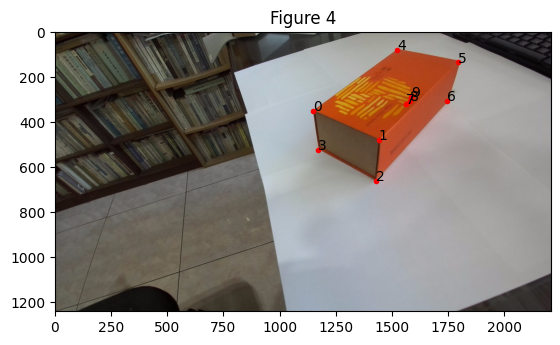

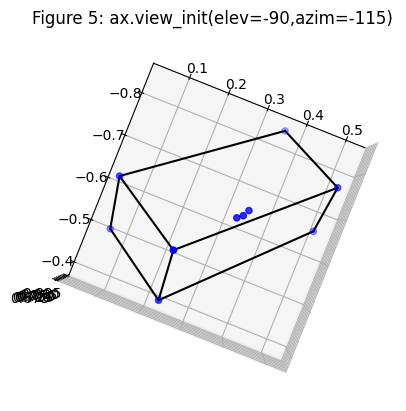

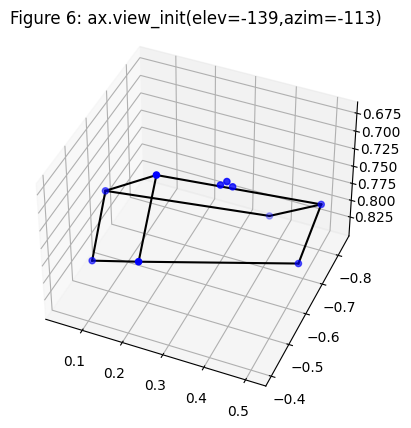

In [171]:
# TODO 7 (5 points): Visualize the 3D reconstruction.
fig4 = plt.figure()
plt.imshow(img1)
plt.scatter(pts1[:,0],pts1[:,1],marker='.',c='r')

for i,p in enumerate(pts1):
    plt.text(p[0],p[1],str(i))

plt.title('Figure 4')


fig5 = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=-90,azim=-115)

vertices = X_best.T

connect_point = {0:[1,3,4],2:[1,3,6],5:[1,4,6]}

for index, index_num in enumerate(connect_point):
    for i in connect_point[index_num]:
        ax.plot(vertices[0,[index_num,i]],vertices[1,[index_num,i]], vertices[2,[index_num,i]],'k')

ax.scatter3D(X_best[:,0], X_best[:,1], X_best[:,2],c='b')
plt.title('Figure 5: ax.view_init(elev=-90,azim=-115)')

fig6 = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=-139,azim=-113)

vertices = X_best.T

connect_point = {0:[1,3,4],2:[1,3,6],5:[1,4,6]}

for index, index_num in enumerate(connect_point):
    for i in connect_point[index_num]:
        ax.plot(vertices[0,[index_num,i]],vertices[1,[index_num,i]], vertices[2,[index_num,i]],'k')

ax.scatter3D(X_best[:,0], X_best[:,1], X_best[:,2],c='b')
plt.title('Figure 6: ax.view_init(elev=-139,azim=-113)')
